In [ ]:
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt


def load_data(filename, var):
        df=pd.read_excel(filename)
        data=df[var]
        return df,data
    
def count_first_digit(data_str):
    mask=df[data_str]>=1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>=10:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in range(1,10):
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage, unique

def get_expected_counts(total_count, benford_list):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count) for p in benford_list]


#1st_bar_chart
def bar_chart(data_pct, BENFORD):
    
    benford_list_chart1 =[]
    
    for i in range(len(BENFORD)):
        benford_list_chart1.append(BENFORD[i]*100)

    """Make bar chart of observed vs expected 1st digit frequency in percent."""

    fig, ax = plt.subplots()
    index = [i + 1 for i in range(len(data_pct))]  # 1st digits for x-axis
# text for labels, title and ticks

    fig.canvas.set_window_title('Percentage First Digits')
    ax.set_title('Data vs. Benford Values', fontsize=15)
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=14)



    # build bars    
    rects = ax.bar(index, data_pct, width=0.95, color='black', label='Data')

    # attach a text label above each bar displaying its height

    for rect in rects:

        height = rect.get_height()

        ax.text(rect.get_x() + rect.get_width()/2, height,

                '{:0.1f}'.format(height), ha='center', va='bottom', 

                fontsize=13)



    # plot Benford values as red dots

    ax.scatter(index, benford_list_chart1, s=150, c='red', zorder=2, label='Benford')



    # Hide the right and top spines & add legend

    ax.spines['right'].set_visible(True)

    ax.spines['top'].set_visible(True)

    ax.legend(prop={'size':15}, frameon=True)

    

    plt.show()
      
def bar_chart2(data_pct, BENFORD):
    
    benford_list_chart2 =[]
    
    for i in range(len(BENFORD)):
        benford_list_chart2.append(BENFORD[i]*100)
        
    labels=list(data_percentage) 
    x = np.arange(1,len(data_percentage)+1) # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,6))
    rects1 = ax.bar(x, data_percentage, width, color='black', label='Data')
    rects2 = ax.bar(x + width, benford_list_chart2,width,color='blue', label='Benford')
    #rects3 = plt.plot(x, data_percentage,'red')
    
    for rect in rects1:

        height = rect.get_height()

        ax.text(rect.get_x() + rect.get_width()/2, height,

                '{:0.1f}'.format(height), ha='center', va='bottom', 

                fontsize=13)
        
    for rect in rects2:

        height = rect.get_height()

        ax.text(rect.get_x() + rect.get_width()/2, height,

                '{:0.1f}'.format(height), ha='center', va='bottom', 

                fontsize=13)
    
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_title('Benford')
    ax.set_xticks(x)
    ax.legend()
    #plt.savefig("Polska_wykres_benford.jpg")
    plt.show()

In [ ]:
def chi_square_test(data_count,expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected

    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 15.51.")    
    return chi_square_stat < 15.51

In [ ]:
def Kolmogorow_Smirnof(data_percentage, benford_list):
    #alpha 0.05 i m=9 n=9
    probability_KS_test=[]
    for i in range(len(data_percentage)):
         probability_KS_test.append(data_percentage[i]/100)
    
    distribution_emp = []
    distribution_emp.append(probability_KS_test[0])
    distribution_teo = []
    distribution_teo.append(benford_list[0])
    
    for i in range(1,len(probability_KS_test)):
        distribution_emp.append(probability_KS_test[i]+distribution_emp[i-1])
        distribution_teo.append(benford_list[i]+distribution_teo[i-1])
        
    dlist=[]
    for i in range(len(probability_KS_test)):
        dlist.append(math.fabs(distribution_emp[i]-distribution_teo[i]))
    
    D=max(dlist)
    Critical_value = 54/81
    # jeśli true to jest różnica
    return  distribution_emp,distribution_teo, D>Critical_value

In [ ]:
def Measure_Similaristy_1(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_1 =[]
    M1 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_1.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.fabs((data_percentage[i]-probability_measure_similaristy_list_1[i])/probability_measure_similaristy_list_1[i])
        
    
    M1 = (100/len(data_percentage))*sum
    
    
    return M1
    

In [ ]:
def Measure_Similaristy_2(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_2 =[]
    M2 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_2.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.pow((data_percentage[i]-probability_measure_similaristy_list_2[i]),2)
        
    
    M2 = (math.sqrt(sum)/len(data_percentage))
    
    
    return M2

In [ ]:
def Measure_Similaristy_3(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_3 =[]
    M3 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_3.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.pow((data_percentage[i]-probability_measure_similaristy_list_3[i]),2)
        
    
    M3 = (math.sqrt(sum/len(data_percentage)))
    
    
    return M3

In [ ]:
BENFORD = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

In [ ]:
[df,dat]=load_data('Poland_COVID.xlsx',"new_cases")

In [ ]:
df

,date,new_cases
0,2020-03-04,1.0
1,2020-03-05,0.0
2,2020-03-06,4.0
3,2020-03-07,0.0
4,2020-03-08,6.0
...,...,...
730,2022-03-04,12489.0
731,2022-03-05,12725.0
732,2022-03-06,7698.0
733,2022-03-07,5583.0


In [ ]:
df[df["new_cases"]==df["new_cases"].max()]

,date,new_cases
694,2022-01-27,57659.0


In [ ]:
df['inputDate'] = pd.to_datetime(df['date'])
df['dayOfWeek'] = df['inputDate'].dt.day_name()
df

,date,new_cases,inputDate,dayOfWeek
0,2020-03-04,1.0,2020-03-04,Wednesday
1,2020-03-05,0.0,2020-03-05,Thursday
2,2020-03-06,4.0,2020-03-06,Friday
3,2020-03-07,0.0,2020-03-07,Saturday
4,2020-03-08,6.0,2020-03-08,Sunday
...,...,...,...,...
730,2022-03-04,12489.0,2022-03-04,Friday
731,2022-03-05,12725.0,2022-03-05,Saturday
732,2022-03-06,7698.0,2022-03-06,Sunday
733,2022-03-07,5583.0,2022-03-07,Monday


In [ ]:
df['date_str'] = df['date'].astype(str)

In [ ]:
df.describe()

,new_cases
count,735.000000
mean,7837.412245
std,10521.708019
min,0.000000
25%,354.500000
50%,2296.000000
75%,12744.000000
max,57659.000000


In [ ]:
from scipy.stats import variation 

def stats (data):
  print("Mean", data.mean())
  print("Varation", data.var())
  print("Std", data.std())
  print("Median", data.median())
  print("Mode", data.mode())
  print("Skew", data.skew())
  print("Kurtosis", data.kurtosis())
  print("Variation", variation(data))

In [ ]:
stats(df.new_cases)

Mean 7837.412244897959
Varation 110706339.62682533
Std 10521.708018512267
Median 2296.0
Mode 0    215.0
dtype: float64
Skew 1.8020652164535182
Kurtosis 3.62207216023953
Variation 1.341584138901327


Testing how to show cycle of a week

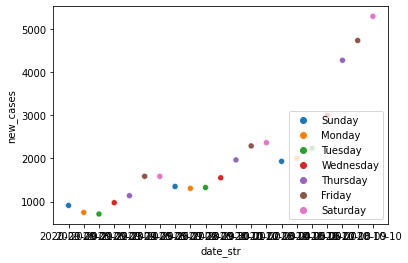

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

 
# Use the 'hue' argument to provide a factor variable
sns.scatterplot( x="date_str", y="new_cases", data=df[200:221], hue='dayOfWeek', legend=True)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

<Figure size 432x288 with 0 Axes>

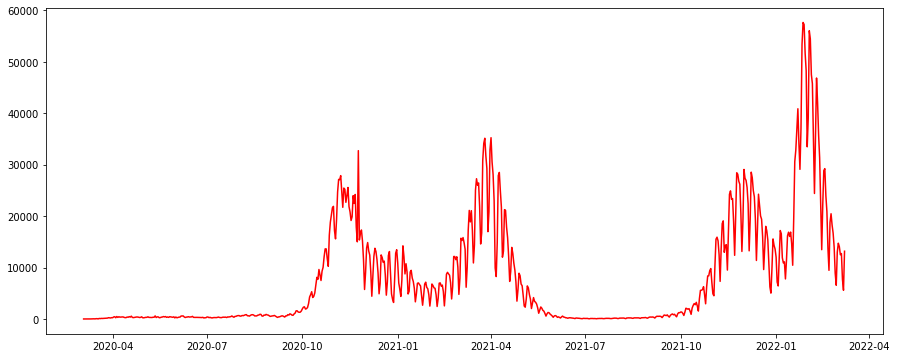

In [ ]:
plt.figure()
plt.figure(figsize=(15,6))
plt.plot(df["date"], df["new_cases"],'red')
#plt.savefig("Polska_wykres_zakazenia.jpg")

In [ ]:
df["new_cases"].max()

15133.0

In [ ]:
[total_count,data_count, data_percentage,unique]=count_first_digit('new_cases')

In [ ]:
data_percentage

[28.376534788540248,
 19.918144611186904,
 14.188267394270124,
 8.049113233287859,
 8.321964529331515,
 6.684856753069577,
 5.5934515688949515,
 3.547066848567531,
 5.320600272851296]

In [ ]:
data_perc_na_100 =[]
for i in range(len(data_percentage)):
        data_perc_na_100.append(data_percentage[i]/100)
        
data_perc_na_100

[0.2837653478854025,
 0.19918144611186903,
 0.14188267394270124,
 0.08049113233287858,
 0.08321964529331514,
 0.06684856753069578,
 0.05593451568894951,
 0.03547066848567531,
 0.05320600272851296]

In [ ]:
expected_counts=get_expected_counts(total_count, BENFORD)

In [ ]:
print(Measure_Similaristy_1(data_percentage,BENFORD))
print(Measure_Similaristy_2(data_percentage,BENFORD))
print(Measure_Similaristy_3(data_percentage,BENFORD))

17.574222773653645
0.858034386011512
2.574103158034536


In [ ]:
ks_2samp(data_perc_na_100, BENFORD)

KstestResult(statistic=0.2222222222222222, pvalue=0.9894693541752365)

In [ ]:
Kolmogorow_Smirnof(data_percentage, BENFORD)

([0.35255570117955437,
  0.5609436435124509,
  0.6697247706422018,
  0.7431192660550459,
  0.7876802096985583,
  0.8401048492791612,
  0.9003931847968545,
  0.9488859764089121,
  1.0],
 [0.301,
  0.477,
  0.602,
  0.699,
  0.7779999999999999,
  0.845,
  0.903,
  0.9540000000000001,
  1.0],
 False)

In [ ]:
chi_square_test(data_count,expected_counts)


Chi-squared Test Statistic = 31.461
Critical value at a P-value of 0.05 is 15.51.


False

C:\Users\DELL\AppData\Local\Temp/ipykernel_5592/1857582723.py:48: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


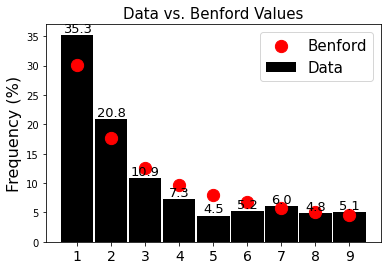

In [ ]:
bar_chart(data_percentage,BENFORD)

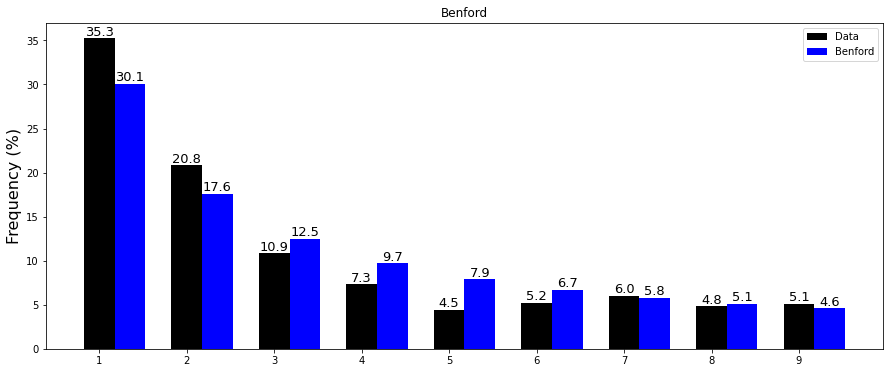

In [ ]:
bar_chart2(data_percentage,BENFORD)

In [ ]:
Kolmogorow_Smirnof(data_percentage,BENFORD)

([0.35255570117955437,
  0.5609436435124509,
  0.6697247706422018,
  0.7431192660550459,
  0.7876802096985583,
  0.8401048492791612,
  0.9003931847968545,
  0.9488859764089121,
  1.0],
 [0.301,
  0.477,
  0.602,
  0.699,
  0.7779999999999999,
  0.845,
  0.903,
  0.9540000000000001,
  1.0],
 False)

In [ ]:
#def z_test(data_percentage, benford_list):
    
 #   data_percentage_z_test=[]
  #  for i in range(len(data_percentage)):
   #      data_percentage_z_test.append(data_percentage[i]/100)
            
   # z_stat = 0  # chi square test statistic
    
   # for empir, teor in zip(data_percentage_z_test, benford_list):
        
        
   # return data_percentage_z_test

In [ ]:
[df,dat]=load_data('Poland_COVID.xlsx',"new_cases")

In [ ]:
[total_count,data_count, data_percentage,unique]=count_first_digit('new_cases')

In [ ]:
print(data_count)

In [ ]:
data_percentage

In [ ]:
BENFORD = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

In [ ]:
#z_test(data_percentage,BENFORD)

In [ ]:
data_percentage

In [ ]:
expected_counts=get_expected_counts(total_count, BENFORD)

In [ ]:
chi_square_test(data_count,expected_counts)

In [ ]:
bar_chart(data_percentage,BENFORD)

In [ ]:
BENFORD

In [ ]:
bar_chart2(data_percentage,BENFORD)

In [ ]:
[df,dat]=load_data('Europa_COVID.xlsx',"new_cases")

In [ ]:
[total_count,data_count, data_percentage,unique]=count_first_digit('new_cases')

In [ ]:
print(total_count)
print(data_count)

In [ ]:
BENFORD = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

In [ ]:
sum(BENFORD)

In [ ]:
expected_counts=get_expected_counts(total_count, BENFORD)

In [ ]:
chi_square_test(data_count,expected_counts)

In [ ]:
bar_chart(data_percentage,BENFORD )

In [ ]:
def count_2_digit(data_str):
    mask=df[data_str]>=1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>=100:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in range(1,100):
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage, unique

In [ ]:
[df,dat]=load_data('Poland_COVID.xlsx',"new_cases")

In [ ]:
[total_count,data_count, data_percentage,unique]=count_2_digit('new_cases')

In [ ]:
len(unique)

In [ ]:
benford_first_2=[];


In [ ]:
expected_counts=get_expected_counts(total_count, benford_first_2)

In [ ]:
chi_square_test(data_count,expected_counts)

In [ ]:
print(Measure_Similaristy_1(data_percentage,benford_first_2))
print(Measure_Similaristy_2(data_percentage,benford_first_2))
print(Measure_Similaristy_3(data_percentage,benford_first_2))

In [ ]:
bar_chart2(data_percentage, benford_first_2)

In [ ]:
def count_3_digit(data_str):
    mask=df[data_str]>=1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>=1000:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in range(1,1000):
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage, unique

In [ ]:
[df,dat]=load_data('Europa_COVID.xlsx',"new_cases")

In [ ]:
[total_count,data_count, data_percentage,unique]=count_3_digit('new_cases')

In [ ]:
benford_first_3=[];
for i in range(1,1000):
    benford_first_3.append(math.log10(1+1/i))

In [ ]:
expected_counts=get_expected_counts(total_count, benford_first_3)

In [ ]:
#chi_square_test(data_count,expected_counts)

In [ ]:
#bar_chart(data_percentage, benford_first_3)

In [ ]:
def count_2_second(data_str):
    mask=df[data_str]>=1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>=100:
            data[i]=data[i]/10
        data[i]=data[i]-data[i]%10
        data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in range(0,10):
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage, unique

In [ ]:
[df,dat]=load_data('Germany_COVID.xlsx',"new_cases")

In [ ]:
[total_count,data_count, data_percentage,unique]=count_2_second('new_cases')

In [ ]:
benford_only_2=[];
for i in range(0,10):
    suma=0
    for j in range(1,10):
        suma=suma+math.log10(1+1/(10*j+i))
    benford_only_2.append(suma)

In [ ]:
expected_counts=get_expected_counts(total_count, benford_only_2)

In [ ]:
chi_square_test(data_count,expected_counts)

In [ ]:
print(Measure_Similaristy_1(data_percentage,benford_only_2))
print(Measure_Similaristy_2(data_percentage,benford_only_2))
print(Measure_Similaristy_3(data_percentage,benford_only_2))

In [ ]:
bar_chart(data_percentage, benford_only_2)

In [ ]:
test_list=[1,2,3,4]

In [ ]:
def test(pc):
    for i in range(len(pc)):
        pc[i]=pc[i]*100
    return pc

In [ ]:
t1=test(test_list)
print(t1)

In [ ]:
test_list

In [ ]:
# First, we will take the input:  
lower_value = 1  
upper_value = 9999
primes=[]
for number in range (lower_value, upper_value + 1):  
    if number > 1:  
        for i in range (2, number):  
            if (number % i) == 0:  
                break  
        else:  
            primes.append(number)  

In [ ]:
#primes

In [ ]:
def prime_x(x):
    data=x
    for i in range(len(data)):
        while data[i]>=10:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in range(1,10):
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage, unique

In [ ]:
[total_count,data_count, data_percentage,unique]=prime_x(primes)

In [ ]:
expected_counts=get_expected_counts(total_count, BENFORD)

In [ ]:
total_count

In [ ]:
bar_chart(data_percentage, BENFORD)

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('Z1.jpg','r')

In [ ]:
pix_value = list(im.getdata())

In [ ]:
pix_value[0]

In [ ]:
pic_value_flat=[x for sets in pix_value for x in sets]

In [ ]:
pic_value_flat

In [ ]:
[total_count,data_count, data_percentage,unique]=prime_x(pic_value_flat)

In [ ]:
expected_counts=get_expected_counts(total_count, BENFORD)

In [ ]:
data_percentage

C:\Users\DELL\AppData\Local\Temp/ipykernel_21032/314771730.py:48: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


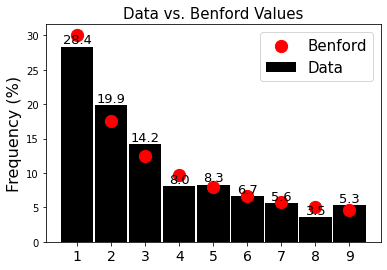

In [ ]:
bar_chart(data_percentage, BENFORD)

In [ ]:
BENFORD = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

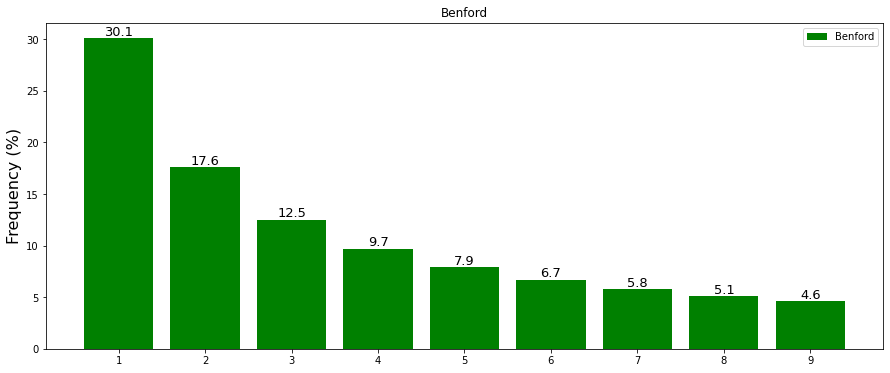

In [ ]:
benford_list_chart2 =[]
    
for i in range(len(BENFORD)):
    benford_list_chart2.append(BENFORD[i]*100)
        
labels=list(data_percentage) 
x = np.arange(1,len(data_percentage)+1) # the label locations
width = 0.8  # the width of the bars
fig, ax = plt.subplots(figsize=(15,6))
rects2 = ax.bar(x, benford_list_chart2,width,color='green', label='Benford')

for rect in rects2:

        height = rect.get_height()

        ax.text(rect.get_x() + rect.get_width()/2, height,

                '{:0.1f}'.format(height), ha='center', va='bottom', 

                fontsize=13)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Benford')
ax.set_xticks(x)
ax.legend()
plt.savefig("Wykres_benford.jpg")
plt.show()

In [ ]:
sum(BENFORD)

1.0